In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import PySulfSat as ss

In [2]:
sys.path.append(r'G:\My Drive\Berkeley_NEW\MELTS_python_Paula\melts_matlab_git_master\package')

In [3]:
!pip install --upgrade "https://github.com/gleesonm1/pyMELTScalc/archive/refs/tags/v0.0.7.zip"

  Created wheel for pyMELTScalc: filename=pyMELTScalc-0.0.7-py3-none-any.whl size=19157 sha256=6c996557fbb56dae061e0c434d1061cd77a90424a95b5850a2cc6979fd435393
  Stored in directory: C:\Users\penny\AppData\Local\Temp\pip-ephem-wheel-cache-1n_tbkcx\wheels\d3\74\38\9faa31392586574e5b0e73e1bff5a4b83cabdd1e490413519d
Successfully built pyMELTScalc
  Attempting uninstall: pyMELTScalc
    Found existing installation: pyMELTScalc 0.0.6
    Uninstalling pyMELTScalc-0.0.6:
      Successfully uninstalled pyMELTScalc-0.0.6


In [4]:
import pyMELTScalc as M
M.__version__

'0.0.7'

In [5]:
df_out2=ss.import_data('Glass_input_example.xlsx', sheet_name='Glass_input', 
                       suffix="_Liq", sample_label='Sample_ID_Liq')
df_out2.head()


test3=df_out2.iloc[0]

We have replaced all missing liquid oxides and strings with zeros. 


In [30]:
test3

SiO2_Liq       50.822
TiO2_Liq        2.056
Al2O3_Liq      13.235
FeOt_Liq       13.339
MnO_Liq         0.252
MgO_Liq         6.631
CaO_Liq        11.356
Na2O_Liq         2.49
K2O_Liq         0.247
P2O5_Liq        0.189
H2O_Liq           0.0
Fe3Fet_Liq        0.0
Ni_Liq_ppm        0.0
Cu_Liq_ppm        0.0
Sample_ID         H_1
SiO2           50.822
Na2O             2.49
K2O             0.247
FeOt           13.339
Cr2O3            0.04
MnO             0.252
CaO            11.356
TiO2            2.056
MgO             6.631
Al2O3          13.235
P2O5            0.189
Total         100.754
Name: 0, dtype: object

In [6]:
df_ideal_MELTS = pd.DataFrame(columns=['SiO2_Liq', 'TiO2_Liq', 'Al2O3_Liq',
'FeOt_Liq',  'MgO_Liq', 'CaO_Liq', 'Na2O_Liq', 'K2O_Liq',
'P2O5_Liq',  'MnO_Liq', 'CO2_Liq', 'H2O_Liq', 'Fe3Fet_Liq'])

df_ideal_MELTS2=df_ideal_MELTS.rename(columns={'Fe3Fet_Liq': 'Fe3Fet'}).to_dict()

test4=test3.reindex(df_ideal_MELTS2, axis=1).fillna(0)
test5=test4.to_dict()

In [27]:
test5['Fe3Fet']=0.1
test

In [12]:
type(test3)

pandas.core.series.Series

In [31]:
test3['H2O_Liq']=0.1

C:\Users\penny\AppData\Local\Temp\ipykernel_25180\2858094443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test3['H2O_Liq']=0.1


In [33]:
P=1000
test=M.multi_iso_crystallise(Model = "MELTSv1.0.2", 
                        Fe3Fet_Liq=0.1,
                        comp = test3.to_dict(), 
                        Frac_solid = True, 
                        Frac_fluid = True, 
                        T_start_C = 1200, 
                        T_end_C = 750, 
                        dt_C = 5, 
                        P_path_bar = P, 
                        find_liquidus = True)

In [34]:
test2=test['All']

In [35]:
test2.columns[test2.columns.str.contains('SiO2')]

Index(['SiO2_Liq', 'SiO2_Cpx', 'SiO2_Plag', 'SiO2_Cpx2', 'SiO2_rutile1',
       'SiO2_Sp', 'SiO2_Ol', 'SiO2_whitlockite1'],
      dtype='object')

In [36]:
test2.head()

,T_C,P_bar,h,s,v,SiO2_Liq,TiO2_Liq,Al2O3_Liq,Cr2O3_Liq,Fe2O3_Liq,...,Na2O_whitlockite1,K2O_whitlockite1,P2O5_whitlockite1,H2O_whitlockite1,CO2_whitlockite1,Fe3Fet_whitlockite1,h_whitlockite1_prop,mass_whitlockite1_prop,v_whitlockite1_prop,rho_whitlockite1_prop
0,1179.700000,1000.0,-1.180676e+06,264.191326,36.590693,50.386348,2.038376,13.121548,0.0,1.468823,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,1174.703488,1000.0,-1.182433e+06,262.979871,36.447230,50.364941,2.079988,13.353934,0.0,1.472726,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2,1169.706977,1000.0,-1.152172e+06,255.125955,35.446411,50.329120,2.182600,13.201932,0.0,1.514798,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
3,1164.710465,1000.0,-1.085714e+06,241.004085,33.492630,50.283802,2.287899,13.046274,0.0,1.559499,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
4,1159.713953,1000.0,-1.024687e+06,228.008024,31.693729,50.227928,2.397205,12.884931,0.0,1.607389,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0


In [37]:
Smythe_CalcSulf=ss.calculate_Smythe2017_SCSS(df=test2, 
                                             T_K=test2['T_C']+273.15, 
P_kbar=test2['P_bar']/1000, Fe_FeNiCu_Sulf=0.65,
Fe3Fet_Liq=test2['Fe3Fet_Liq'])

Smythe_CalcSulf.head()

Using inputted Fe_FeNiCu_Sulf ratio for calculations.
You havent entered a value for Ni_FeNiCu_Sulf and Cu_FeNiCu_Sulf so we cant calculate the non-ideal SCSS


,SCSS_ideal_ppm_Smythe2017,SCSS_ideal_ppm_Smythe2017_1sigma,T_Input_K,P_Input_kbar,Fe_FeNiCu_Sulf,Fe3Fet_Liq_input,Si_wt_atom,Ti_wt_atom,Al_wt_atom,Mg_wt_atom,...,Na2O_whitlockite1,K2O_whitlockite1,P2O5_whitlockite1,H2O_whitlockite1,CO2_whitlockite1,Fe3Fet_whitlockite1,h_whitlockite1_prop,mass_whitlockite1_prop,v_whitlockite1_prop,rho_whitlockite1_prop
0,1418.668555,387.537370,1452.850000,1.0,0.65,0.099881,0.473365,0.014401,0.145286,0.092073,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,1403.504696,383.395062,1447.853488,1.0,0.65,0.099173,0.473420,0.014703,0.147939,0.088606,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2,1454.308254,397.273059,1442.856977,1.0,0.65,0.098508,0.473777,0.015451,0.146469,0.086457,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
3,1511.396189,412.867757,1437.860465,1.0,0.65,0.098064,0.474064,0.016221,0.144961,0.084258,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
4,1575.717392,430.438366,1432.863953,1.0,0.65,0.097842,0.474277,0.017022,0.143392,0.081973,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0


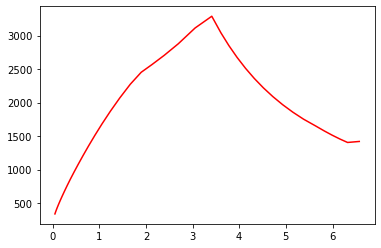

In [38]:
plt.plot(test2['MgO_Liq'], Smythe_CalcSulf['SCSS_ideal_ppm_Smythe2017'],
         '-r')

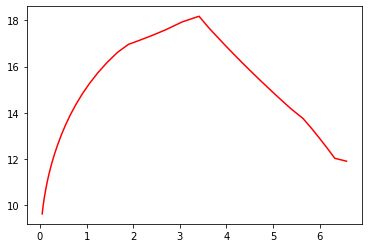

In [40]:
plt.plot( test2['MgO_Liq'],test2['FeO_Liq'],
         '-r')